In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

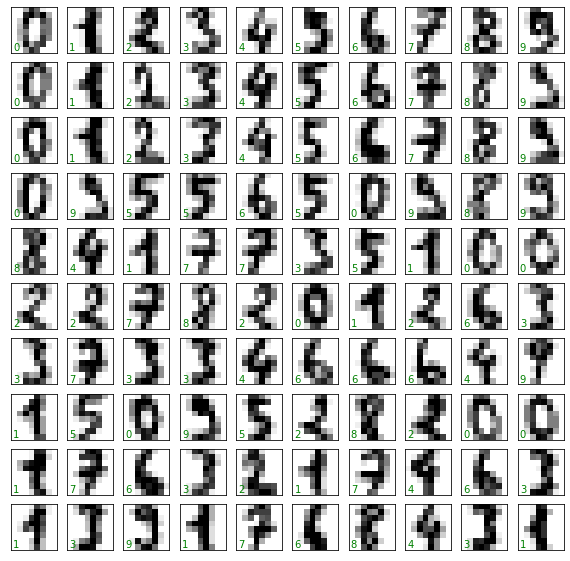

In [7]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(10, 10),
                         subplot_kw={"xticks":[], "yticks":[]},
                         gridspec_kw=dict(hspace=0.2, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap="binary", interpolation="nearest")
    # print target
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color="green")

In [3]:
# Flattened images
X = digits.data
X.shape

(1797, 64)

In [4]:
y = digits.target
y.shape

(1797,)

In [5]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

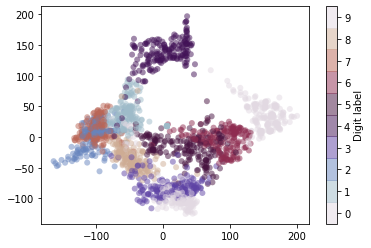

In [6]:
plt.scatter(data_projected[:,0], data_projected[:,1], c=digits.target,
            edgecolor="none", alpha=0.5, cmap=plt.cm.get_cmap("twilight", 10))
plt.colorbar(label="Digit label", ticks=range(10))
plt.clim(-0.5, 9.5)

In [8]:
# Clasification on digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [11]:
print("X train", Xtrain.shape)
print("X test", ytest.shape)

X train (1347, 64)
X test (450,)


In [12]:
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [13]:
model.score(Xtest, ytest)

0.8333333333333334

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

Text(30.5, 0.5, 'true value')

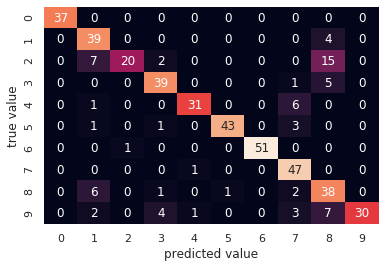

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

mat = confusion_matrix(ytest, y_model)
_ = sns.heatmap(mat, annot=True, cbar=False)
_.set_ylim(10, 0)
plt.xlabel("predicted value")
plt.ylabel("true value")


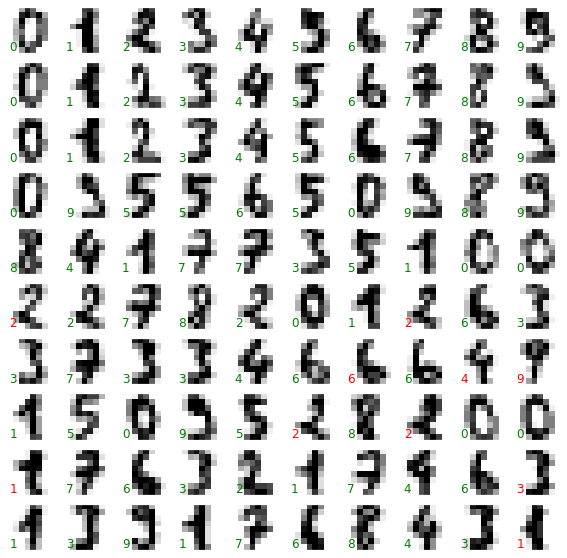

In [31]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(10, 10),
                         subplot_kw={"xticks":[], "yticks":[]},
                         gridspec_kw=dict(hspace=0.2, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap="binary", interpolation="nearest")
    # print target
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, 
            color="green" if (ytest[i] == y_model[i]) else "red")